# Analysis of the continuum spectra emitted by 3 different galaxies

### Assumptions: 
1) The continuum part of the spectra is due only to stars.

2) The emission spectra of stars is a black body spectra.

3) The initial mass function is given by the following relation: $I.M.F. = \frac{dN}{dM} \propto M^{-2.35}$

4) All the star are born at the same time

In [2]:
import numpy as np
from tqdm.notebook import tqdm
import astropy.constants as const
import pylab as plt
from astropy.modeling import models
from astropy import units as u
from astropy.visualization import quantity_support

In [3]:
import numpy as np
import scipy.stats
import pylab as plt
import math
from scipy.stats import norm
import astropy
from astropy.modeling import models
from astropy import units as u
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.visualization import quantity_support

In [5]:
M_sun = const.M_sun.cgs.value

# Functions:

In [14]:
def Properties(M):
    L_sun = const.L_sun.cgs.value
    R_sun = const.R_sun.cgs.value
    sigma = const.sigma_sb.cgs.value
    
    if(M.any()>=1.2*M_sun):
        R_M_relation = 0.56 #CNO
    
    else:
        R_M_relation = 0.43 #pp chain
   
    R = R_sun*((M/M_sun)**(R_M_relation))
    
    L_M_relation = 3.5
    L = L_sun*((M/M_sun)**(L_M_relation))*(u.erg/u.s)
    
    Temp = (L / (4*(math.pi)*(R**2*(u.cm**2))*sigma*(u.erg/((u.K**4)*(u.cm**2)*u.s))))**(1/4)
    
    numb_stars = (M/M_sun)**(-2.35)
    S = 4*(math.pi)*((R/R_sun)**2)
    scale_factor = numb_stars*S
    
    
    return Temp, scale_factor

def max_mass (t):
    t_sun = (10**10)*u.yr #age of the sun
    mass_max = ((t_sun/t).value)**(1/2.5)
    return mass_max

def obs_Flux (int_Flux, wave, EBV):
    Rv = 4.05
    wave = wave*10**(-4)
    #define k in the different wl
    if(wave.any()<0.63):
        k = 2.659*((-2.156) + (1.509/wave) - (0.198/(wave**2)) + (0.011/(wave**3))) + Rv
    if(wave.any()>0.63):
        k = 2.569*((-1.857) + (1.040/wave)) + Rv
        
    A_lambda = k*EBV
    
    obs_Flux = int_Flux*10**(-0.4*A_lambda)

    return obs_Flux
 

# Emission of stars

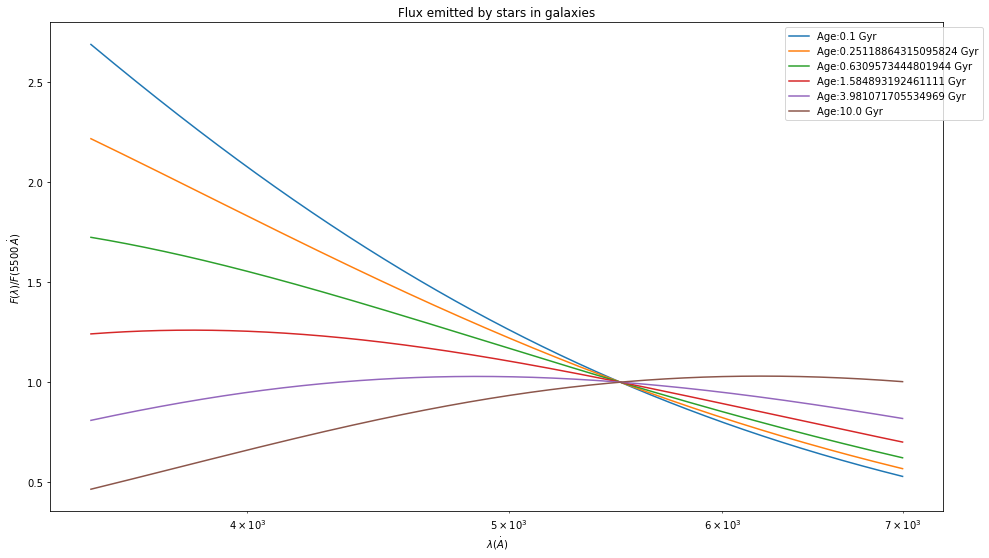

In [15]:
time = np.logspace(8, 10, 6)*u.yr
mass_max = max_mass(time)
wav = np.arange(3500, 7000)

plt.figure(figsize=(16,9))
for i in range(0, len(time)):
    Mass = np.linspace(0.1, mass_max[i], 100) #choosing step=1 we have dM=const=1 in I.M.F
    Mass = Mass*M_sun 

    Temp, scale_factor = Properties(Mass)

    bb =  np.sum([models.BlackBody(temperature=Temperature, scale=S_F *(u.erg/(u.cm**2 * u.AA * u.s * u.sr))) for Temperature, S_F in zip(Temp, scale_factor)])

    flux = bb(wav*u.AA)/bb(5500*u.AA)
    
    plt.semilogx(wav, flux, label='Age:{} Gyr'.format(time[i]/((10**9)*u.yr)))
    plt.title("Flux emitted by stars in galaxies")
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.ylabel("$F(\lambda) / F(5500 \, \dot{A})$")
    plt.xlabel("$\lambda(\dot{A})$")

plt.show()

# Emission of stars considering dust

We can relax the assumption of perfect black body emission from stars

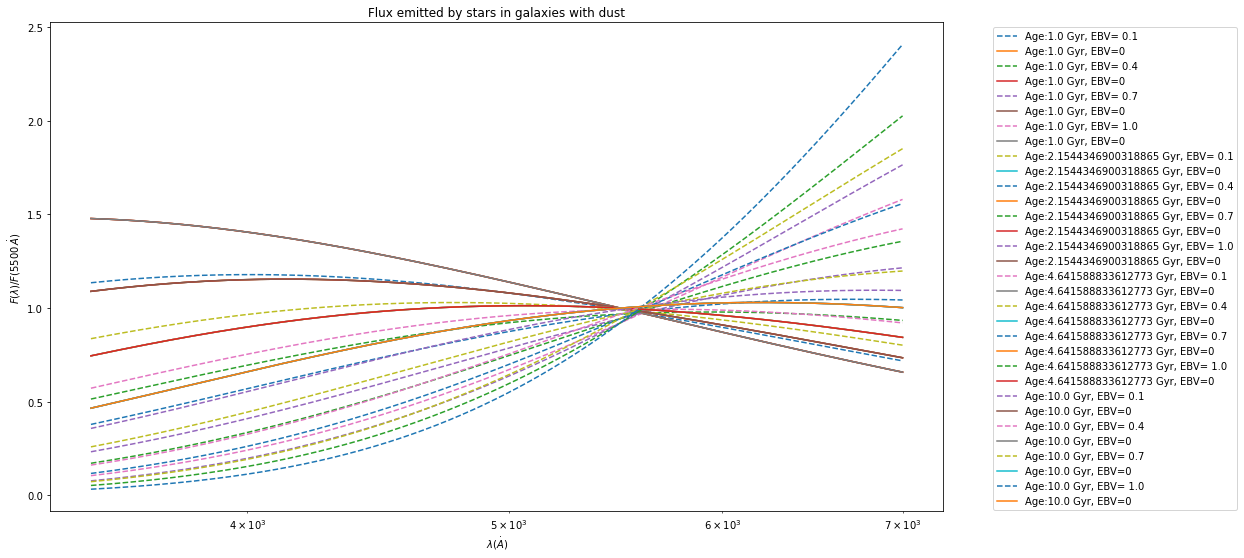

In [22]:
time = np.logspace(9, 10, 4)*u.yr
mass_max = max_mass(time)
wav = np.arange(3500, 7000)
EBV = np.linspace(0.1, 1, 4)

plt.figure(figsize=(16,9))
k_norm = 2.659*((-2.156) + (1.509/0.5500) - (0.198/(0.5500**2)) + (0.011/(0.5500**3))) + 4.05
for i in range(0, len(time)):
    Mass = np.linspace(0.1, mass_max[i], 100) #choosing step=1 we have dM=const=1 in I.M.F
    Mass = Mass*M_sun 

    Temp, scale_factor = Properties(Mass)

    bb =  np.sum([models.BlackBody(temperature=Temperature, scale=S_F *(u.erg/(u.cm**2 * u.AA * u.s * u.sr))) for Temperature, S_F in zip(Temp, scale_factor)])

    flux= bb(wav*u.AA)/bb(5500*u.AA)
    
    for j in range(0, len(EBV)):
    
        flux_obs = obs_Flux(flux, wav, EBV[j])
                                      
        A_lambda_norm = EBV[j]*k_norm
        obs_Flux_norm = flux_obs/(10**(-0.4*A_lambda_norm))
   
        plt.semilogx(wav, obs_Flux_norm, label='Age:{0} Gyr, EBV= {1}'.format((time[i]/((10**9)*u.yr)), EBV[j]), linestyle="--")
        plt.semilogx(wav, flux, label='Age:{} Gyr, EBV=0'.format(time[i]/((10**9)*u.yr)))
        plt.title("Flux emitted by stars in galaxies with dust")
        plt.legend(bbox_to_anchor=(1.05,1))
        plt.ylabel("$F(\lambda) / F(5500 \, \dot{A})$")
        plt.xlabel("$\lambda(\dot{A})$")

plt.show()

We can see that for high EBV we have a strong absortion by the dust and so the flux is demagnified. The radiation is infact shifted toward red, and it's difficult to understand if the red emission of a galaxy is due to the age of this galaxy or to the absorption of gas.

But we jave degeneracy in the model due to the effects of the age and of the dust